In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [3]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "labels_df.pkl"))

In [4]:
# filter out the features that contains the substring 'Post'
# features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

In [5]:
features_df.head()

,Session,Gaze_Counts_In_RoI_Pre,Gaze_Counts_In_RoI_Post,Gaze_Counts_Out_RoI_Pre,Gaze_Counts_Out_RoI_Post,Gaze_In\out_RoI_Ratio_Pre,Gaze_In\out_RoI_Ratio_Post,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Count_Post,Gaze_Re_Entries_To_RoI_Rate_Pre,...,DVA_Max_Gaze_Post,DVA_Min_Gaze_Post,DVA_Mean_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Mean_Fixations_Post,DVA_Std_Fixations_Post,DVA_Max_Fixations_Post,DVA_Min_Fixations_Post
0,Session B,0,824,3233,1519,0.000000,0.542462,0,2,0.000000,...,29.269375,1.374307,20.688776,5.371169,28.025879,8.212250,15.874513,8.388128,23.692208,3.101723
1,Session B,0,180,2793,2175,0.000000,0.082759,0,1,0.000000,...,31.482871,5.488468,25.109906,4.940303,31.112558,16.151324,18.737548,8.010507,31.315954,6.633146
2,Session B,410,626,2553,499,0.160595,1.254509,4,11,0.657570,...,20.492683,1.386197,15.411616,7.234109,24.488889,1.478562,8.018283,8.359753,20.464611,3.133708
3,Session B,1528,2204,2869,211,0.532590,10.445498,7,3,0.756757,...,14.453083,0.544839,8.251771,4.371875,16.652556,1.448095,2.443365,1.195681,4.389356,0.985724
4,Session B,404,1723,2675,1354,0.151028,1.272526,2,6,0.320000,...,12.084075,0.335563,11.280768,5.542903,19.881704,0.544214,4.336466,3.576194,11.462437,0.834279


In [6]:
# Drop column Session
features_df = features_df.drop(columns=['Session'])

In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 116 entries, Gaze_Counts_In_RoI_Pre to DVA_Min_Fixations_Post
dtypes: float64(107), int32(9)
memory usage: 679.6 KB


In [8]:
labels_df.head()

,mem
series_id,
0,1
1,1
2,1
3,1
4,1


In [9]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 779
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mem     780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


Data Cleaning

how many missing values are there in each column? show the top 10

In [10]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(50)

Pupil radius_Fixations_First_Diff_Pre            182
Pupil radius_Fixations_First_Diff_Post           182
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre     182
Pupil radius_Fixations_ReEntry_Mean_Diff_Post    182
onset_Std_Saccades_Start_In_RoI_Post             129
Duration_Max_Saccades_Start_In_RoI_Pre           129
onset_Max_Saccades_Start_In_RoI_Pre              129
vis_angle_Max_Saccades_Start_In_RoI_Pre          129
peak_velocity_Max_Saccades_Start_In_RoI_Pre      129
onset_Min_Saccades_Start_In_RoI_Pre              129
Duration_Min_Saccades_Start_In_RoI_Pre           129
peak_velocity_Min_Saccades_Start_In_RoI_Pre      129
vis_angle_Min_Saccades_Start_In_RoI_Pre          129
onset_Max_Saccades_Start_In_RoI_Post             129
Duration_Max_Saccades_Start_In_RoI_Post          129
vis_angle_Max_Saccades_Start_In_RoI_Post         129
peak_velocity_Max_Saccades_Start_In_RoI_Post     129
onset_Min_Saccades_Start_In_RoI_Post             129
Duration_Min_Saccades_Start_In_RoI_Post       

Remove columns with more than 20% missing values

In [11]:
features_df = features_df.loc[:, features_df.isna().sum(axis=0) < 0.2 * features_df.shape[0]]

In [12]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

onset_Mean_Saccades_Start_In_RoI_Pre           129
onset_Max_Saccades_Start_In_RoI_Post           129
Duration_Max_Saccades_Start_In_RoI_Pre         129
vis_angle_Max_Saccades_Start_In_RoI_Pre        129
peak_velocity_Max_Saccades_Start_In_RoI_Pre    129
onset_Min_Saccades_Start_In_RoI_Pre            129
Duration_Min_Saccades_Start_In_RoI_Pre         129
vis_angle_Min_Saccades_Start_In_RoI_Pre        129
onset_Mean_Saccades_Start_In_RoI_Post          129
onset_Std_Saccades_Start_In_RoI_Post           129
dtype: int64

how many missing values are there in each row? show the top 10

In [13]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

153    65
581    65
430    64
600    64
712    64
621    64
194    64
620    64
196    64
203    64
dtype: int64

Remove rows with more than 50% missing values

In [14]:
features_df = features_df.loc[features_df.isna().sum(axis=1) < 0.8 * features_df.shape[1], :]
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

153    65
581    65
430    64
600    64
712    64
621    64
194    64
620    64
196    64
203    64
dtype: int64

Fill missing values with the mean of the column

In [15]:
features_df = features_df.fillna(features_df.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()

Train/Test Split (before any preprocessing is done)

In [16]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "series_id_df.pkl"))
#
# # Create a list of unique subject IDs
# subject_ids = series_id_df[config.SUBJECT].unique()
#
# # Shuffle the list of subject IDs randomly
# random = np.random
# random.seed(1)
# random.shuffle(subject_ids)
#
# # Split the list of subject IDs into two parts
# train_subject_ids = subject_ids[:int(len(subject_ids)*0.9)]
# test_subject_ids = subject_ids[int(len(subject_ids)*0.9):]
#
# # Subset the data based on the split list of subject IDs
# train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
# test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]
#
# X_train = features_df[features_df.index.isin(train_data.index)]
# X_test = features_df[features_df.index.isin(test_data.index)]
# y_train = labels_df[labels_df.index.isin(train_data.index)]
# y_test = labels_df[labels_df.index.isin(test_data.index)]

In [17]:
print('Features shape:', features_df.shape)
print('Labels shape:', labels_df['mem'].shape)

Features shape: (780, 112)
Labels shape: (780,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df,
                                                    labels_df['mem'],
                                                    random_state=420,
                                                    test_size=0.2)

In [19]:
X_test.head()

,Gaze_Counts_In_RoI_Pre,Gaze_Counts_In_RoI_Post,Gaze_Counts_Out_RoI_Pre,Gaze_Counts_Out_RoI_Post,Gaze_In\out_RoI_Ratio_Pre,Gaze_In\out_RoI_Ratio_Post,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Count_Post,Gaze_Re_Entries_To_RoI_Rate_Pre,Gaze_Re_Entries_To_RoI_Rate_Post,...,DVA_Max_Gaze_Post,DVA_Min_Gaze_Post,DVA_Mean_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Mean_Fixations_Post,DVA_Std_Fixations_Post,DVA_Max_Fixations_Post,DVA_Min_Fixations_Post
148,412,483,2508,1122,0.164274,0.430481,2,1,0.331071,0.428449,...,19.550319,0.196086,11.587361,6.140334,19.572668,1.100194,9.147416,7.709451,17.771927,0.494544
596,1773,175,2053,1429,0.863614,0.122463,6,1,0.742299,0.420994,...,16.461037,2.946240,6.676284,5.942862,18.632478,0.939036,12.004023,2.571197,13.822134,10.185913
358,0,0,2639,933,0.000000,0.000000,0,0,0.000000,0.000000,...,25.564315,5.210898,17.469052,9.020427,27.849670,0.000000,15.611541,8.492080,25.240189,5.966926
228,8,605,3878,1281,0.002063,0.472287,1,5,0.122459,1.034340,...,32.465925,0.458256,18.230192,1.989687,20.302880,15.213327,11.326109,10.075856,26.348153,1.997239
243,702,1718,3691,8,0.190192,214.750000,2,1,0.223264,0.393391,...,6.913571,0.238018,14.508287,5.363533,25.385682,1.116161,2.400796,0.444948,3.081489,1.919286


Balancing the dataset

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=420)
X_train, y_train = sm.fit_resample(X_train, y_train)

Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

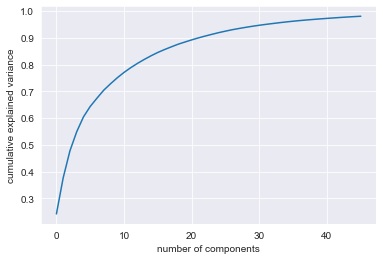

In [22]:
pca = PCA(n_components=0.98).fit(X_test_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [23]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [24]:
X_train_pca

array([[-6.70897369, -0.14302543,  1.74422566, ...,  0.70768861,
         0.22645499, -0.04454817],
       [-3.39277851, -5.48541113,  1.91128051, ..., -0.46309533,
        -0.33847389, -0.19510289],
       [-2.36740257,  1.29444042,  0.6759053 , ...,  0.13393117,
        -0.07400239,  0.39782241],
       ...,
       [-2.90721774,  1.7790057 , -0.0149766 , ...,  0.33406991,
        -0.0140894 ,  0.19252445],
       [-2.20110695,  7.39572886,  5.30841232, ..., -0.52658212,
        -0.15360222,  0.13751728],
       [-2.89983903,  2.05761971,  0.2394407 , ...,  0.1894867 ,
        -0.31758999, -0.01878495]])

LDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

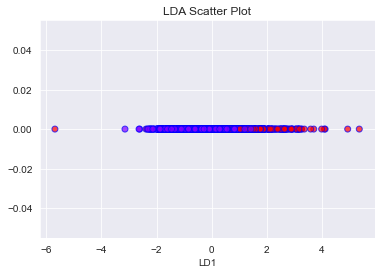

In [26]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [27]:
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

Classification models

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [30]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 0.9, 15)
PENALTY = ['l1', 'l2']
SOLVER = ['liblinear', 'saga']

PARAM_GRID  = {
    'C': C,
    'penalty': PENALTY,
    'solver': SOLVER
}

# Create the logistic regression estimator
estimator = LogisticRegression(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'C': 0.7092857142857143, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression (test data)
Accuracy: 0.61
Precision: 0.83
Recall: 0.67
F1-score: 0.74
ROC-AUC score: 0.49


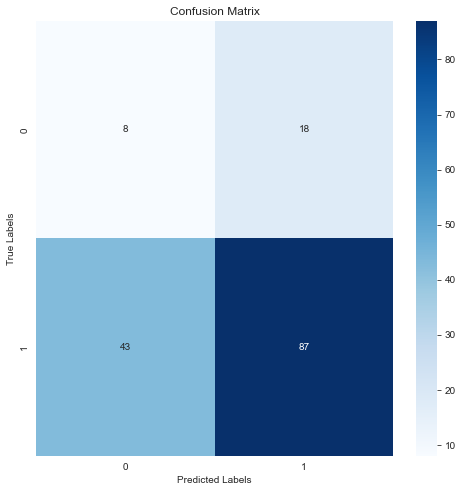

In [31]:
# Get the best estimator
log_reg_best_estimator = model_searcher.best_estimator_
y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)

evaluate_model("Logistic Regression (test data)", y_test, y_test_pred)

Gradient Boosting model

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 4)
N_ESTIMATORS = range(100, 180, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 175}

Gradient Boosting (test data)
Accuracy: 0.74
Precision: 0.84
Recall: 0.86
F1-score: 0.85
ROC-AUC score: 0.51


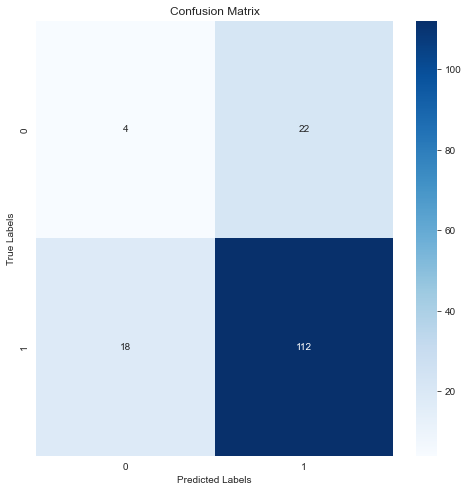

In [33]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Random Forest model

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 120, 15)
MAX_DEPTH = range(2, 5)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 95}

Random Forest (test data)
Accuracy: 0.63
Precision: 0.83
Recall: 0.7
F1-score: 0.76
ROC-AUC score: 0.48


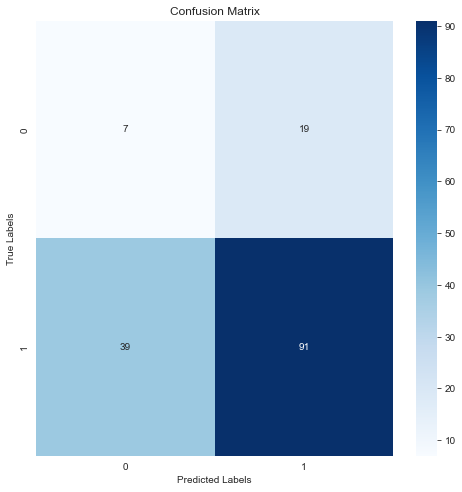

In [35]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [36]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.05, 0.5, 10)
MAX_DEPTH = range(1, 4)
N_ESTIMATORS = range(70, 150, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the XGBoost estimator
estimator = XGBClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.45, 'max_depth': 3, 'n_estimators': 100}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.67
Precision: 0.81
Recall: 0.8
F1-score: 0.8
ROC-AUC score: 0.42


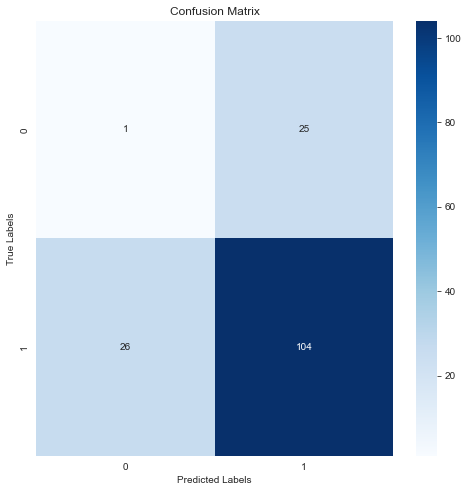

In [37]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [38]:
!pip install pytorch-tabnet
!pip install optuna

In [39]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [40]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
final_classifier = TabNetClassifier(**best_params)
final_classifier.fit(X_train_np, y_train)
best_params

[I 2023-06-06 16:19:15,009] A new study created in memory with name: no-name-2023d1b7-326d-43fe-9a39-6833917b51ff



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53402


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:15,926] Trial 0 finished with value: 0.5340236686390532 and parameters: {'n_d': 43, 'n_a': 56, 'n_steps': 4, 'gamma': 0.6111942402177748, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.028128811141477437}. Best is trial 0 with value: 0.5340236686390532.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:16,461] Trial 1 finished with value: 0.5310650887573964 and parameters: {'n_d': 26, 'n_a': 19, 'n_steps': 9, 'gamma': 1.4763431078358231, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.04972036811322602}. Best is trial 0 with value: 0.5340236686390532.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53107

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50385


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:17,560] Trial 2 finished with value: 0.5038461538461538 and parameters: {'n_d': 42, 'n_a': 28, 'n_steps': 5, 'gamma': 0.8079474698077915, 'n_independent': 9, 'n_shared': 7, 'lambda_sparse': 0.05598792951550308}. Best is trial 0 with value: 0.5340236686390532.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51923


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:18,943] Trial 3 finished with value: 0.5192307692307693 and parameters: {'n_d': 41, 'n_a': 8, 'n_steps': 7, 'gamma': 0.967324061615665, 'n_independent': 10, 'n_shared': 8, 'lambda_sparse': 0.055216048684709536}. Best is trial 0 with value: 0.5340236686390532.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:19,198] Trial 4 finished with value: 0.49171597633136094 and parameters: {'n_d': 26, 'n_a': 28, 'n_steps': 2, 'gamma': 1.8332831324478576, 'n_independent': 6, 'n_shared': 2, 'lambda_sparse': 0.03490973747899827}. Best is trial 0 with value: 0.5340236686390532.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49172


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:19,668] Trial 5 finished with value: 0.4409763313609467 and parameters: {'n_d': 29, 'n_a': 19, 'n_steps': 3, 'gamma': 1.3105729404705904, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.011832368532984104}. Best is trial 0 with value: 0.5340236686390532.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.44098

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48846


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:21,960] Trial 6 finished with value: 0.4884615384615385 and parameters: {'n_d': 63, 'n_a': 36, 'n_steps': 7, 'gamma': 1.8288811711582307, 'n_independent': 8, 'n_shared': 10, 'lambda_sparse': 0.0127707868078502}. Best is trial 0 with value: 0.5340236686390532.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.40385


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:23,482] Trial 7 finished with value: 0.4038461538461538 and parameters: {'n_d': 23, 'n_a': 29, 'n_steps': 8, 'gamma': 1.9615704542589023, 'n_independent': 9, 'n_shared': 7, 'lambda_sparse': 0.06807899235182567}. Best is trial 0 with value: 0.5340236686390532.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:23,710] Trial 8 finished with value: 0.43476331360946746 and parameters: {'n_d': 15, 'n_a': 49, 'n_steps': 1, 'gamma': 0.6447515694368079, 'n_independent': 5, 'n_shared': 5, 'lambda_sparse': 0.014581064446534755}. Best is trial 0 with value: 0.5340236686390532.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.43476

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.46568


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:25,213] Trial 9 finished with value: 0.46568047337278107 and parameters: {'n_d': 34, 'n_a': 49, 'n_steps': 9, 'gamma': 0.4114546873222179, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.07163158497731816}. Best is trial 0 with value: 0.5340236686390532.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:26,024] Trial 10 finished with value: 0.5375739644970414 and parameters: {'n_d': 53, 'n_a': 64, 'n_steps': 4, 'gamma': 0.18076738014571975, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.09016861219070245}. Best is trial 10 with value: 0.5375739644970414.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53757


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:26,847] Trial 11 finished with value: 0.39215976331360947 and parameters: {'n_d': 54, 'n_a': 62, 'n_steps': 4, 'gamma': 0.11157002013736472, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.09556012142828159}. Best is trial 10 with value: 0.5375739644970414.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.39216

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51686


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:28,028] Trial 12 finished with value: 0.5168639053254438 and parameters: {'n_d': 52, 'n_a': 64, 'n_steps': 5, 'gamma': 0.19121388038750053, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.09276032471661583}. Best is trial 10 with value: 0.5375739644970414.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:28,634] Trial 13 finished with value: 0.4970414201183431 and parameters: {'n_d': 51, 'n_a': 53, 'n_steps': 3, 'gamma': 0.4972232046109417, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.03033184622757519}. Best is trial 10 with value: 0.5375739644970414.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49704


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:29,496] Trial 14 finished with value: 0.48786982248520705 and parameters: {'n_d': 64, 'n_a': 56, 'n_steps': 6, 'gamma': 0.36862392499355195, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.00022425300258955075}. Best is trial 10 with value: 0.5375739644970414.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48787


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:30,131] Trial 15 finished with value: 0.41139053254437874 and parameters: {'n_d': 44, 'n_a': 41, 'n_steps': 4, 'gamma': 0.6854031768972161, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.08645081278485856}. Best is trial 10 with value: 0.5375739644970414.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.41139


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:30,391] Trial 16 finished with value: 0.48949704142011835 and parameters: {'n_d': 56, 'n_a': 58, 'n_steps': 1, 'gamma': 0.295338587133209, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.08099854485357083}. Best is trial 10 with value: 0.5375739644970414.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.4895


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:30,854] Trial 17 finished with value: 0.590828402366864 and parameters: {'n_d': 47, 'n_a': 44, 'n_steps': 3, 'gamma': 0.1066776866156178, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.0999151934063888}. Best is trial 17 with value: 0.590828402366864.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.59083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:31,126] Trial 18 finished with value: 0.5991124260355029 and parameters: {'n_d': 8, 'n_a': 41, 'n_steps': 2, 'gamma': 0.12907062862364982, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.09870733469232815}. Best is trial 18 with value: 0.5991124260355029.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.59911


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:31,470] Trial 19 finished with value: 0.5181952662721894 and parameters: {'n_d': 13, 'n_a': 42, 'n_steps': 2, 'gamma': 0.10478661652807432, 'n_independent': 5, 'n_shared': 6, 'lambda_sparse': 0.09793079069459656}. Best is trial 18 with value: 0.5991124260355029.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5182


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:31,827] Trial 20 finished with value: 0.5366863905325445 and parameters: {'n_d': 19, 'n_a': 42, 'n_steps': 2, 'gamma': 0.42339012040797874, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.08007680848309232}. Best is trial 18 with value: 0.5991124260355029.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53669


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:32,320] Trial 21 finished with value: 0.47011834319526624 and parameters: {'n_d': 48, 'n_a': 36, 'n_steps': 3, 'gamma': 0.24661670710665967, 'n_independent': 1, 'n_shared': 9, 'lambda_sparse': 0.0989589063119161}. Best is trial 18 with value: 0.5991124260355029.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47012


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:32,752] Trial 22 finished with value: 0.6263313609467456 and parameters: {'n_d': 8, 'n_a': 47, 'n_steps': 3, 'gamma': 0.11197739466881915, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.0857568872892501}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.62633


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:33,007] Trial 23 finished with value: 0.4928994082840236 and parameters: {'n_d': 8, 'n_a': 46, 'n_steps': 1, 'gamma': 0.3053976163416216, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.08811735304441294}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.4929


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:33,233] Trial 24 finished with value: 0.4918639053254438 and parameters: {'n_d': 8, 'n_a': 48, 'n_steps': 2, 'gamma': 0.11260773417208507, 'n_independent': 1, 'n_shared': 5, 'lambda_sparse': 0.09966697708752786}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49186


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:33,743] Trial 25 finished with value: 0.42085798816568043 and parameters: {'n_d': 35, 'n_a': 40, 'n_steps': 3, 'gamma': 0.5300481966819889, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.08037359467058854}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.42086


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:34,307] Trial 26 finished with value: 0.42159763313609466 and parameters: {'n_d': 14, 'n_a': 32, 'n_steps': 5, 'gamma': 0.29682001479004616, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.09130461089398552}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.4216


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:35,179] Trial 27 finished with value: 0.5923076923076923 and parameters: {'n_d': 19, 'n_a': 45, 'n_steps': 10, 'gamma': 0.493511405887485, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.08590206652868741}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.59231


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:35,890] Trial 28 finished with value: 0.5618343195266273 and parameters: {'n_d': 19, 'n_a': 53, 'n_steps': 10, 'gamma': 0.45295055221466807, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.07164367459306605}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56183


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:36,418] Trial 29 finished with value: 0.5084319526627218 and parameters: {'n_d': 12, 'n_a': 37, 'n_steps': 6, 'gamma': 0.5562566349460056, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.08672476494451173}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50843


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:37,013] Trial 30 finished with value: 0.5094674556213018 and parameters: {'n_d': 18, 'n_a': 52, 'n_steps': 10, 'gamma': 0.27944910552442426, 'n_independent': 3, 'n_shared': 1, 'lambda_sparse': 0.0781541895430328}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50947


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:37,410] Trial 31 finished with value: 0.4094674556213018 and parameters: {'n_d': 8, 'n_a': 43, 'n_steps': 4, 'gamma': 0.20594292785089974, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.09362414276795612}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.40947


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:37,723] Trial 32 finished with value: 0.5576923076923077 and parameters: {'n_d': 11, 'n_a': 45, 'n_steps': 3, 'gamma': 0.3724428211560026, 'n_independent': 1, 'n_shared': 6, 'lambda_sparse': 0.09949285864743404}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.55769


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:38,015] Trial 33 finished with value: 0.5044378698224853 and parameters: {'n_d': 22, 'n_a': 38, 'n_steps': 2, 'gamma': 0.11052588511997921, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.08608084780205018}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50444

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50533


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:39,201] Trial 34 finished with value: 0.5053254437869823 and parameters: {'n_d': 31, 'n_a': 33, 'n_steps': 9, 'gamma': 0.7444108322301904, 'n_independent': 2, 'n_shared': 9, 'lambda_sparse': 0.09145861684653232}. Best is trial 22 with value: 0.6263313609467456.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:39,774] Trial 35 finished with value: 0.4119822485207101 and parameters: {'n_d': 39, 'n_a': 46, 'n_steps': 7, 'gamma': 0.5979166845190181, 'n_independent': 1, 'n_shared': 5, 'lambda_sparse': 0.06506098671727809}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.41198


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:40,259] Trial 36 finished with value: 0.5692307692307693 and parameters: {'n_d': 24, 'n_a': 25, 'n_steps': 5, 'gamma': 0.8730874496085141, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.08334666111415935}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56923


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:40,470] Trial 37 finished with value: 0.47958579881656804 and parameters: {'n_d': 17, 'n_a': 9, 'n_steps': 1, 'gamma': 0.37013931215082774, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.07570648205152848}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47959

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5429


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:41,521] Trial 38 finished with value: 0.5428994082840237 and parameters: {'n_d': 27, 'n_a': 57, 'n_steps': 8, 'gamma': 0.49005888813967313, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.09436719100914903}. Best is trial 22 with value: 0.6263313609467456.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:41,932] Trial 39 finished with value: 0.5118343195266273 and parameters: {'n_d': 45, 'n_a': 51, 'n_steps': 2, 'gamma': 0.22318115717401582, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.08392044048403788}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51183

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.44615


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:42,971] Trial 40 finished with value: 0.4461538461538462 and parameters: {'n_d': 60, 'n_a': 32, 'n_steps': 3, 'gamma': 1.0238330936670825, 'n_independent': 10, 'n_shared': 8, 'lambda_sparse': 0.06082642757319894}. Best is trial 22 with value: 0.6263313609467456.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-06 16:19:43,355] Trial 41 finished with value: 0.580473372781065 and parameters: {'n_d': 22, 'n_a': 24, 'n_steps': 4, 'gamma': 0.8740290366001908, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.0841964435939527}. Best is trial 22 with value: 0.6263313609467456.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.58047
epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |

C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 96 | loss: 0.0     |  0:00:00s
epoch 97 | loss: 0.0     |  0:00:00s
epoch 98 | loss: 0.0     |  0:00:00s
epoch 99 | loss: 0.0     |  0:00:00s


{'n_d': 8,
 'n_a': 47,
 'n_steps': 3,
 'gamma': 0.11197739466881915,
 'n_independent': 1,
 'n_shared': 7,
 'lambda_sparse': 0.0857568872892501}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.59
Precision: 0.88
Recall: 0.58
F1-score: 0.7
ROC-AUC score: 0.6


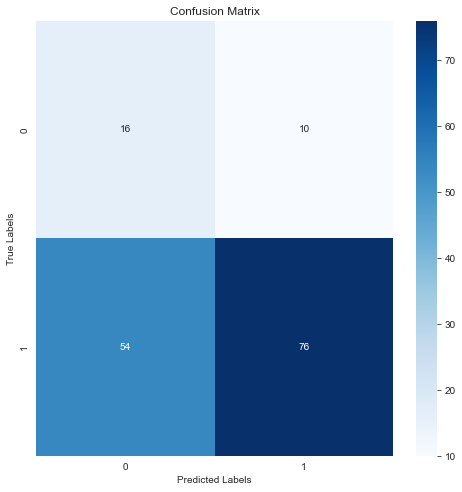

In [41]:
# Evaluate final model on test set
y_test_pred = final_classifier.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [42]:
the_best_model_ever = final_classifier

Feature importance

In [43]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
last_onset_Std_Saccades_End_In_RoI_Pre,0.068481
vis_angle_Saccades_End_First_In_RoI_Pre,0.063202
peak_velocity_Min_Saccades_End_In_RoI_Pre,0.055857
peak_velocity_Max_Saccades_End_In_RoI_Post,0.031068
Duration_Fixations_First_In_RoI_Pre,0.026920
...,...
Duration_Max_Saccades_End_In_RoI_Post,0.001179
Duration_Max_Saccades_Start_In_RoI_Post,0.001111
peak_velocity_Min_Saccades_Start_In_RoI_Post,0.001108
Saccades_End_In\out_RoI_Ratio_Pre,0.000709
